In [1]:
#Imports
import sys
sys.path.append('../python/')
#import NGC5533_functions-newmag as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp
import scipy.interpolate as inter
#import noordermeer as noord

from datetime import datetime
import time

In [2]:
#Halo datathief trace:
halo_dt = dp.getXYdata('../NGC_5005/datatheif_halo_spline.txt')
halo_dtr = halo_dt['xx']
halo_dtv = halo_dt['yy']
halo_dtv=np.asarray(halo_dtv)
#halo_dtv=halo_dtv[:len(halo_dtv)-5]
#halo_dtv=halo_dtv[0::6]
halo_dtv_spline = inter.InterpolatedUnivariateSpline(halo_dtr,halo_dtv,k=5)
halo_dtv_fit = halo_dtv_spline(halo_dtr)

print(halo_dtr)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2]


In [3]:
#parameters for NGC 5533
gamma = 0
h = 8.9                                                     #radial scale-length (kpc)
rc = 1.4                                                    #core radius (kpc)
G = 4.300e-6                                                #gravitational constant (kpc/solar mass*(km/s)^2)
rho00 = 0.31e9                                              #central surface density (solar mass/kpc^3)

#equations from Casertano's paper
rhat = lambda r,z: np.sqrt((r**2)+(z**2))                   #r-hat from Casertano's eq(9)

rho = lambda r,rho00,rc: rho00*((1+((r/rc)**2))**(-1))      #isothermal density profile
v0h = lambda r,rho00,rc,z,G: np.sqrt(rho(r,rho00,rc)*4*np.pi*G*(rhat(r,z)**2))    #eq 9 Casertano
vh = lambda r,rho00,rc,z,G,gamma: v0h(r,rho00,rc,z,G)*((r/rc)**gamma)             #eq 18 halo velocity from Casertano's paper
#vh = lambda r,rho00,rc,z,G: v0h(r,rho00,rc,z,G)            #eq 10 Casertano

print(rhat(1,1))
print(rho(1,rho00,rc))
print(vh(0.001,rho00,rc,0,G,gamma))

1.4142135623730951
205270270.27027026
0.12942551325967705


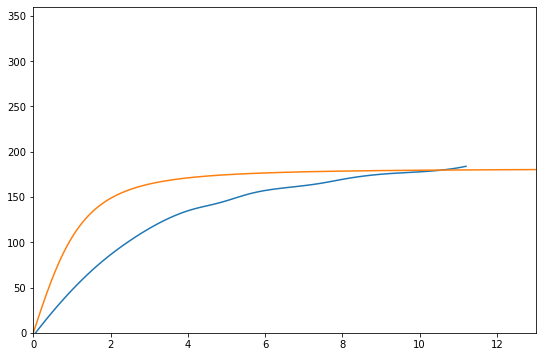

In [4]:
r = np.linspace(0, 25, 500)

plt.figure(figsize=(9,6))
plt.plot(halo_dtr,halo_dtv,label='Fitted Halo')
plt.plot(r, vh(r,rho00,rc,0,G,gamma), linestyle='solid', label='DM Velocity') 

plt.ylim(0,360)
plt.xlim(0,13)
plt.show()

In [5]:
#Imports
import sys
sys.path.append('../python/')
import NGC5533_functions_newmag as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp
import scipy.interpolate as inter
import noordermeer as noord

from datetime import datetime
import time

If you do, DISCARD ALL CHANGES TO THE FILE.
Your calculations will NOT be consistent with this library's equations if you use the disk.hdf5 or bulge.hdf5 files,
and if you write to that file it will contain calculations based on conflicting constants.
Worst case scenario, reset the disk.hdf5 file to before the commit where you used this library to write to it.


In [6]:
def g(r,rc,rho00):
    return nf.h_v(r,rc,rho00,load=False)

In [9]:
# LMFit

#Setup
g_mod = lm.Model(g)
g_params = g_mod.make_params()

#Halo
g_params.add('rc', value=nf.h_rc, min=0.1)          #Core radius (kpc)
g_params.add('rho00', value=nf.hrho00_c, min=0)     #Central density 

#Do fit
g_fit = g_mod.fit(halo_dtv,g_params,r=halo_dtr)
bestg = g_fit.best_fit

In [10]:
g_fit

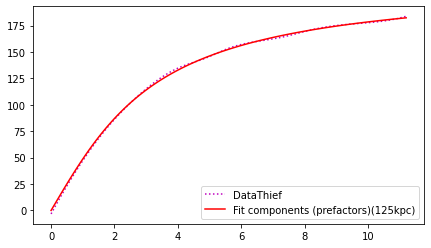

In [12]:
plt.figure(figsize=(7,4))

plt.plot(halo_dtr,halo_dtv,':',color='m',markersize=10,label='DataThief')
plt.plot(halo_dtr,bestg,'r-',label='Fit components (prefactors)(125kpc)')
plt.legend()
#plt.ylim([0,100])
#plt.xlim([0,12.9])
plt.show()